<a href="https://colab.research.google.com/github/almuhannaalhinai/IS-4487/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [47]:
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv"
df = pd.read_csv(url)
display(df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [48]:
display(df.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [49]:
print("Missing values:")
display(df.isnull().sum())

print("\nDuplicate rows:")
display(df.duplicated().sum())

print("\nOutliers (based on describe):")
display(df[['income', 'age', 'num_accts']].describe())

Missing values:


,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0



Duplicate rows:


np.int64(29035)


Outliers (based on describe):


,income,age,num_accts
count,29504.000000,29504.000000,29504.000000
mean,33766.893303,34.773454,2.458345
std,29379.202710,11.369865,19.497380
min,-65600.000000,19.000000,0.000000
25%,13550.000000,26.000000,2.000000
50%,23310.000000,32.000000,2.000000
75%,41690.000000,40.000000,3.000000
max,159450.000000,132.000000,3345.000000


## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [50]:
# Remove outliers based on reasonable ranges for income, age, and number of accounts
df_clean = df[(df['income'] >= 0) & (df['age'] <= 100) & (df['num_accts'] <= 100)]

# Display the shape of the cleaned dataframe to see how many rows were removed
print("Shape of original dataframe:", df.shape)
print("Shape of cleaned dataframe:", df_clean.shape)

Shape of original dataframe: (29504, 14)
Shape of cleaned dataframe: (29500, 14)


In [51]:
# Remove irrelevant variables
df_clean = df_clean.drop(['new_car', 'product', 'num_dependents'], axis=1)
display(df_clean.head())

,answered,income,female,age,job,rent,own_res,chk_acct,sav_acct,num_accts,mobile
0,1,13520,0,23,0,1,0,0,2,0,1
1,0,14780,0,22,2,0,1,3,0,3,0
2,1,37570,0,62,2,0,0,3,0,4,0
3,0,12450,0,33,2,0,1,1,0,2,0
4,0,12400,0,48,1,0,0,2,1,4,0


In [52]:
print("Missing values in cleaned dataframe:")
display(df_clean.isnull().sum())

# There were no missing values after removing outliers and irrelevant columns.
# If there were missing values, I would consider imputation or dropping rows/columns depending on the context.

Missing values in cleaned dataframe:


,0
answered,0
income,0
female,0
age,0
job,0
rent,0
own_res,0
chk_acct,0
sav_acct,0
num_accts,0


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [53]:
# Change "answered" to yes/no and make it categorical
df_clean['answered'] = df_clean['answered'].map({1: 'Yes', 0: 'No'})
df_clean['answered'] = df_clean['answered'].astype('category')

display(df_clean['answered'].head())

,answered
0,Yes
1,No
2,Yes
3,No
4,No


In [55]:
# Convert any variables that should be an integer into an integer
# Based on the data dictionary, 'female', 'age', 'job', 'rent', 'own_res',
# 'chk_acct', 'sav_acct', 'num_accts', and 'mobile' should be integers.
df_clean['female'] = df_clean['female'].replace('M', 1)
for col in ['female', 'age', 'job', 'rent', 'own_res', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']:
    df_clean[col] = df_clean[col].astype(int)

display(df_clean.dtypes)

,0
answered,category
income,int64
female,int64
age,int64
job,int64
rent,int64
own_res,int64
chk_acct,int64
sav_acct,int64
num_accts,int64


### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [56]:
# Convert appropriate variables to categorical
categorical_cols = ['female', 'job', 'rent', 'own_res', 'chk_acct', 'sav_acct', 'mobile', 'num_accts']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

display(df_clean.dtypes)

,0
answered,category
income,int64
female,category
age,int64
job,category
rent,category
own_res,category
chk_acct,category
sav_acct,category
num_accts,category


# Step 3: Exploratory Data Analysis (EDA)

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



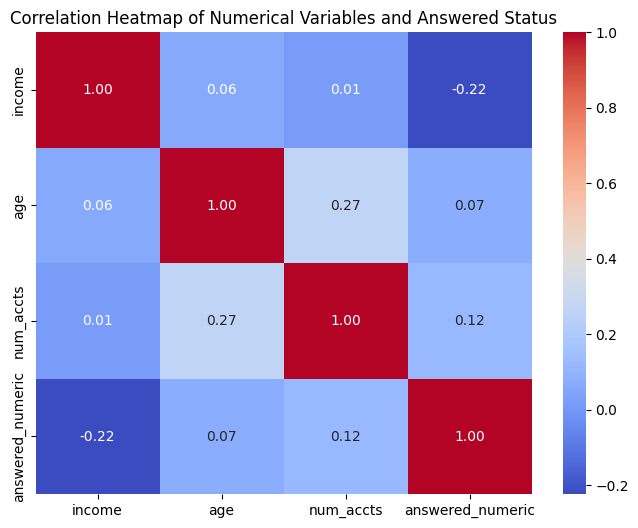

In [62]:
# Calculate the correlation matrix
# Convert 'answered' to numeric for correlation calculation
df_clean['answered_numeric'] = df_clean['answered'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_matrix = df_clean[['income', 'age', 'num_accts', 'answered_numeric']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables and Answered Status')
plt.show()

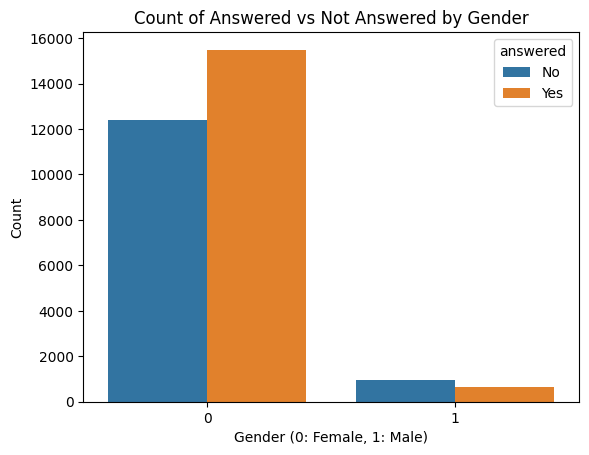

In [58]:
# Chart 2: Relationship between 'female' and 'answered'
sns.countplot(data=df_clean, x='female', hue='answered')
plt.title('Count of Answered vs Not Answered by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

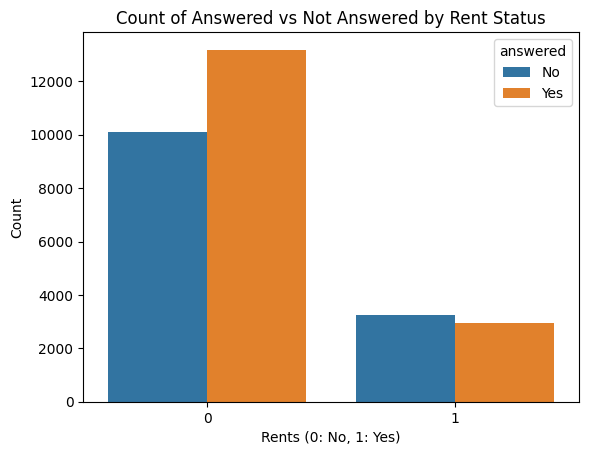

In [59]:
# Chart 3: Relationship between 'rent' and 'answered'
sns.countplot(data=df_clean, x='rent', hue='answered')
plt.title('Count of Answered vs Not Answered by Rent Status')
plt.xlabel('Rents (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

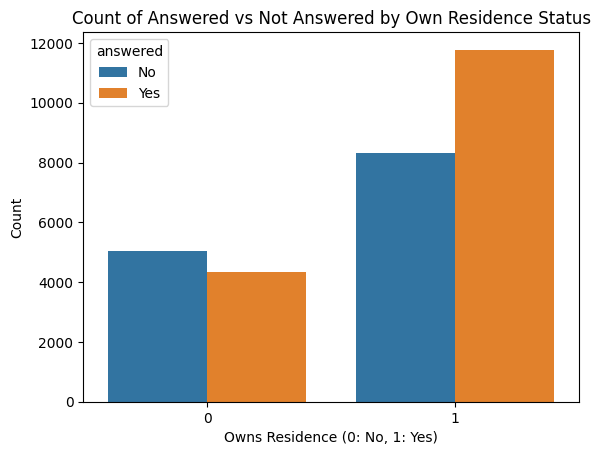

In [60]:
# Chart 4 🔧

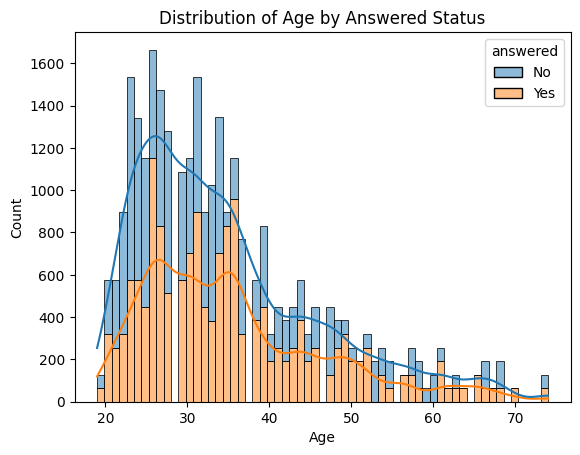

In [61]:
# Chart 5: Distribution of 'age' by 'answered' status
sns.histplot(data=df_clean, x='age', hue='answered', multiple='stack', kde=True)
plt.title('Distribution of Age by Answered Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

In [63]:
# Calculate the base probability of answering
base_probability_answered = df_clean['answered'].value_counts(normalize=True)['Yes']
print(f"Base probability of answering: {base_probability_answered:.4f}")

# The chance of predicting someone *leaving* (not answering) is 1 - base_probability_answered
base_probability_not_answered = 1 - base_probability_answered
print(f"Base probability of not answering (leaving): {base_probability_not_answered:.4f}")

Base probability of answering: 0.5466
Base probability of not answering (leaving): 0.4534


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [64]:
# Split the data into training and testing sets
X = df_clean.drop(['answered', 'answered_numeric'], axis=1) # Features (all columns except 'answered' and 'answered_numeric')
y = df_clean['answered'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22125, 10)
Shape of X_test: (7375, 10)
Shape of y_train: (22125,)
Shape of y_test: (7375,)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [65]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

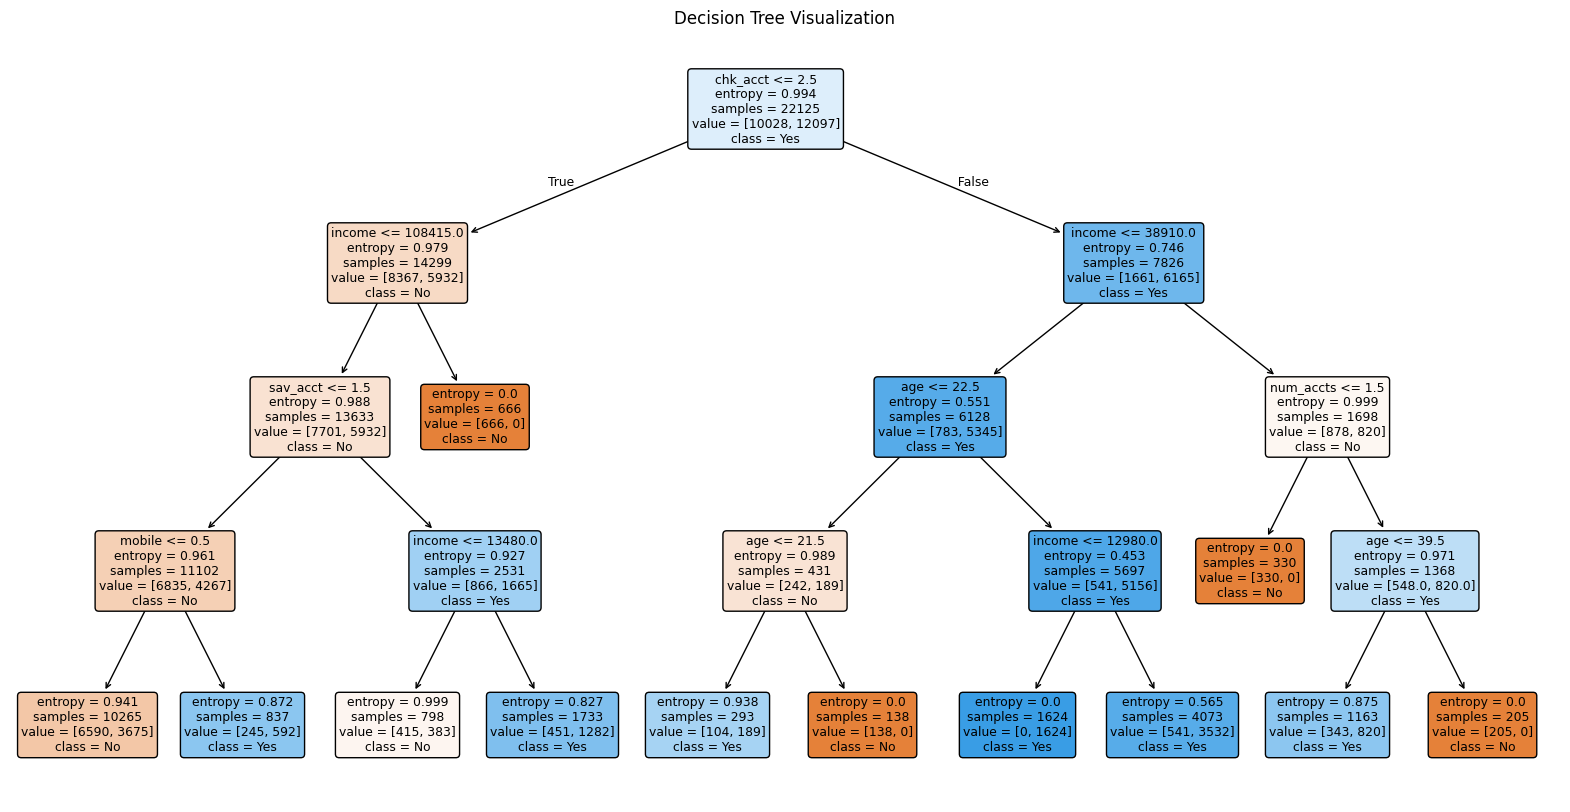

In [66]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [67]:
# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

Accuracy of the Decision Tree model: 0.7285


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [68]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
display(conf_matrix)

Confusion Matrix:


array([[2790,  556],
       [1446, 2583]])

Create a more visual, interpretable version of the matrix

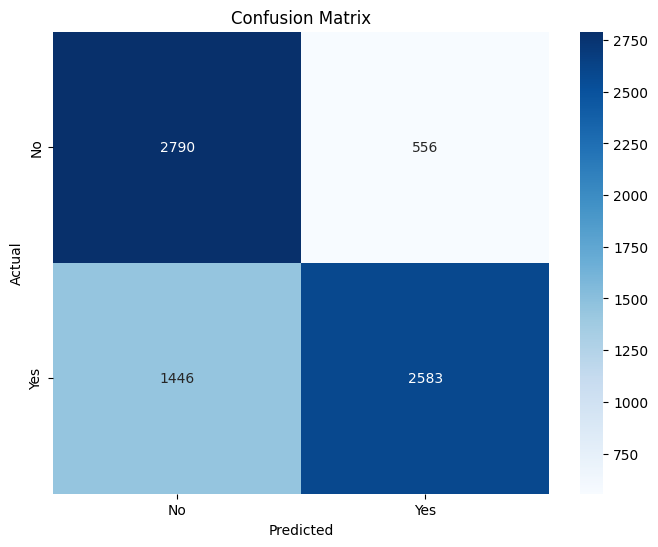

In [69]:
# Create a more visual, interpretable version of the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [70]:
# Extract counts from the confusion matrix
# The confusion matrix is structured as:
# [[True Negatives, False Positives],
#  [False Negatives, True Positives]]
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate profit
profit_model = (tp * 75) - (fp * 25)
print(f"Profit using the Decision Tree model: ${profit_model}")

Profit using the Decision Tree model: $179825


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [71]:
# Calculate the total number of answered and not answered customers in the test set
total_answered_test = y_test.value_counts()['Yes']
total_not_answered_test = y_test.value_counts()['No']

# Calculate baseline profit (if all customers in the test set were called)
# All answered are true positives, all not answered are false positives
baseline_profit = (total_answered_test * 75) - (total_not_answered_test * 25)
print(f"Baseline profit (if all customers in the test set were called): ${baseline_profit}")

Baseline profit (if all customers in the test set were called): $218525


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [73]:
# Tune the model - try a different max_depth
decision_tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

# Train the tuned model
decision_tree_tuned.fit(X_train, y_train)

# Make predictions on the test data with the tuned model
y_pred_tuned = decision_tree_tuned.predict(X_test)

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of the tuned Decision Tree model (max_depth=6): {accuracy_tuned:.4f}")

# Compare with the initial model's accuracy
print(f"Initial Decision Tree model accuracy (max_depth=4): {accuracy:.4f}")

Accuracy of the tuned Decision Tree model (max_depth=6): 0.7681
Initial Decision Tree model accuracy (max_depth=4): 0.7285


In [74]:
print(f"Accuracy of the tuned Decision Tree model (max_depth=6): {accuracy_tuned:.4f}")

Accuracy of the tuned Decision Tree model (max_depth=6): 0.7681


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

In [75]:
# Import the "adviseinvest_new_customer_data.csv" file
url_new_customers = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_new_customer_data.csv"
df_new = pd.read_csv(url_new_customers)
display(df_new.head())

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927


In [77]:
# Preprocess the new customer data to match the training data
# Drop irrelevant columns and convert data types as done for the training data
df_new_processed = df_new.drop(['new_car', 'num_dependents', 'customer_id'], axis=1)

# Ensure columns have the same data types as X_train
for col in X_train.columns:
    if df_new_processed[col].dtype != X_train[col].dtype:
        df_new_processed[col] = df_new_processed[col].astype(X_train[col].dtype)


# Predict on the new customer data using the tuned model
new_customer_predictions = decision_tree_tuned.predict(df_new_processed)

# Add the predictions to the new customer dataframe
df_new['predicted_answered'] = new_customer_predictions

display(df_new.head())

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id,predicted_answered
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597,No
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446,No
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492,No
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143,No
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927,No


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

No, the model did not improve profit — in fact, it reduced it by about $38,700 compared to the baseline strategy of calling everyone.

This means the model’s predictions led to too many missed opportunities (false negatives) or didn’t sufficiently reduce costs from false positives. It likely needs further tuning

### 6.2: How could the model be utilized by the business?

Even though the model did not outperform the baseline in this version, it could still be valuable for operational planning and decision support. AdviseInvest could use the model to prioritize which customers to call first.

For example, focusing on those with a higher predicted likelihood of answering. Over time, by retraining the model with more recent data and tuning its parameters, the company could reduce wasted staff time, optimize call scheduling, and balance workloads across sales representatives.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [78]:
!jupyter nbconvert --to html "assignment_10_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_10_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 917219 bytes to assignment_10_AlhinaiAlmuhanna.html
